In [1]:
%load_ext autoreload
%autoreload 2

from brian2 import *
import matplotlib.pyplot as plt
import numpy as np
from random import sample
import numpy.random as rnd
from math import floor
import time
from src import *

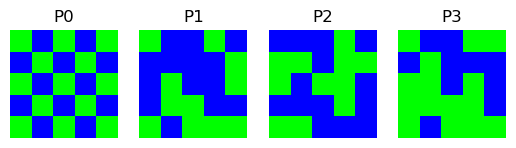

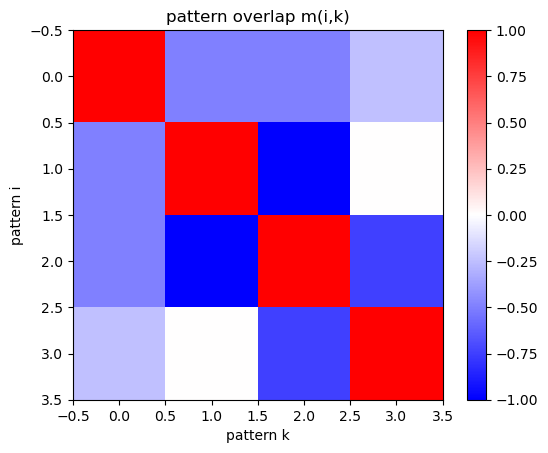

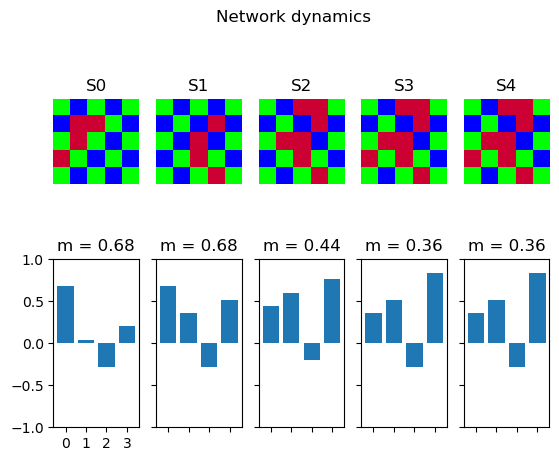

In [6]:
pattern_size = 5

# create an instance of the class HopfieldNetwork
hopfield_net = HopfieldNetwork(nr_neurons= pattern_size**2)
# instantiate a pattern factory
factory = PatternFactory(pattern_size, pattern_size)
# create a checkerboard pattern and add it to the pattern list
checkerboard = factory.create_checkerboard()
pattern_list = [checkerboard]

# add random patterns to the list
pattern_list.extend(factory.create_random_pattern_list(nr_patterns=3, on_probability=0.5))
plot_pattern_list(pattern_list)
# how similar are the random patterns and the checkerboard? Check the overlaps
overlap_matrix = compute_overlap_matrix(pattern_list)
plot_overlap_matrix(overlap_matrix)

# let the hopfield network "learn" the patterns. Note: they are not stored
# explicitly but only network weights are updated !
hopfield_net.store_patterns(pattern_list)

# create a noisy version of a pattern and use that to initialize the network
noisy_init_state = flip_n(checkerboard, nr_of_flips=4)
hopfield_net.set_state_from_pattern(noisy_init_state)

# from this initial state, let the network dynamics evolve.
states = hopfield_net.run_with_monitoring(nr_steps=4)

# each network state is a vector. reshape it to the same shape used to create the patterns.
states_as_patterns = factory.reshape_patterns(states)
# plot the states of the network
plot_state_sequence_and_overlap(states_as_patterns, pattern_list, reference_idx=0, suptitle="Network dynamics")

## 7.3.1

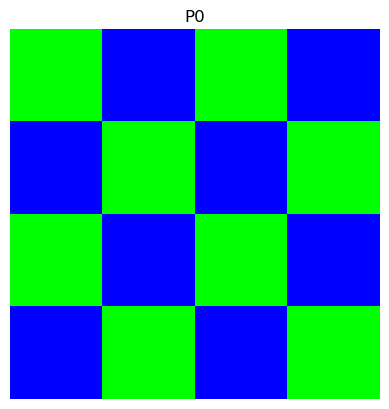

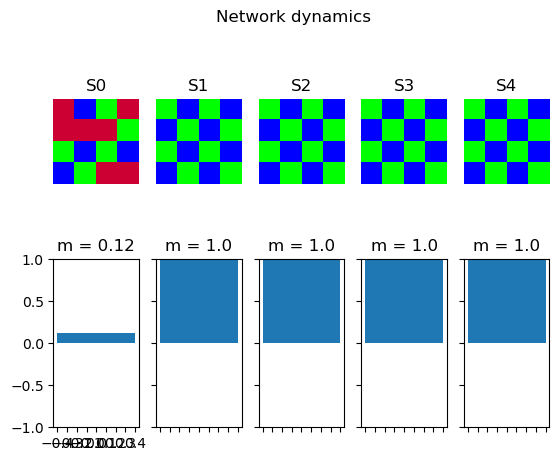

In [11]:
pattern_size = 4

# create an instance of the class HopfieldNetwork
hopfield_net = HopfieldNetwork(nr_neurons= pattern_size**2)
# instantiate a pattern factory
factory = PatternFactory(pattern_size, pattern_size)
# create a checkerboard pattern and add it to the pattern list
checkerboard = factory.create_checkerboard()
pattern_list = [checkerboard]

# add random patterns to the list
# pattern_list.extend(factory.create_random_pattern_list(nr_patterns=3, on_probability=0.5))
plot_pattern_list(pattern_list)
# how similar are the random patterns and the checkerboard? Check the overlaps
# overlap_matrix = compute_overlap_matrix(pattern_list)
# plot_overlap_matrix(overlap_matrix)

# let the hopfield network "learn" the patterns. Note: they are not stored
# explicitly but only network weights are updated !
hopfield_net.store_patterns(pattern_list)

# create a noisy version of a pattern and use that to initialize the network
noisy_init_state = flip_n(checkerboard, nr_of_flips=7)
hopfield_net.set_state_from_pattern(noisy_init_state)

# from this initial state, let the network dynamics evolve.
states = hopfield_net.run_with_monitoring(nr_steps=4)

# each network state is a vector. reshape it to the same shape used to create the patterns.
states_as_patterns = factory.reshape_patterns(states)
# plot the states of the network
plot_state_sequence_and_overlap(states_as_patterns, pattern_list, reference_idx=0, suptitle="Network dynamics")

(array([128.,   0.,   0.,   0.,   0.,  16.,   0.,   0.,   0., 112.]),
 array([-0.0625, -0.05  , -0.0375, -0.025 , -0.0125,  0.    ,  0.0125,
         0.025 ,  0.0375,  0.05  ,  0.0625]),
 <BarContainer object of 10 artists>)

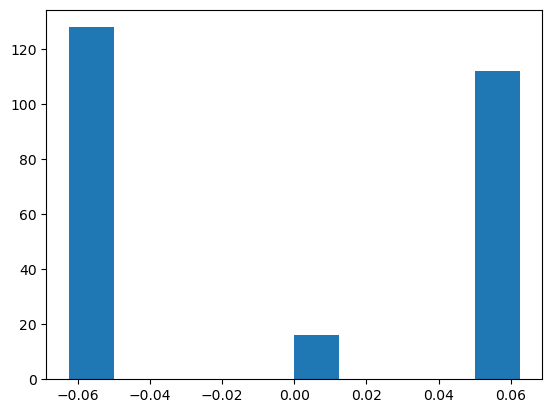

In [12]:
plt.figure()
plt.hist(hopfield_net.weights.flatten())

## 7.5

the alphabet is stored in an object of type: <class 'dict'>
letters are patterns of size: (10, 10). Create a network of corresponding size


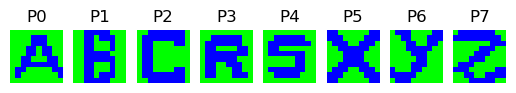

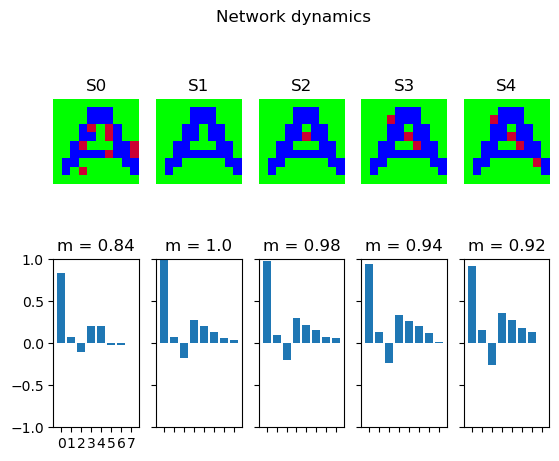

In [14]:
# the letters we want to store in the hopfield network
letter_list = ['A', 'B', 'C', 'R', 'S', 'X', 'Y', 'Z']

# set a seed to reproduce the same noise in the next run
# numpy.random.seed(123)

abc_dictionary = load_alphabet()
print("the alphabet is stored in an object of type: {}".format(type(abc_dictionary)))
# access the first element and get it's size (they are all of same size)
pattern_shape = abc_dictionary['A'].shape
print("letters are patterns of size: {}. Create a network of corresponding size".format(pattern_shape))
# create an instance of the class HopfieldNetwork
hopfield_net = HopfieldNetwork(nr_neurons= pattern_shape[0]*pattern_shape[1])

# create a list using Pythons List Comprehension syntax:
pattern_list = [abc_dictionary[key] for key in letter_list ]
plot_pattern_list(pattern_list)

# store the patterns
hopfield_net.store_patterns(pattern_list)

# # create a noisy version of a pattern and use that to initialize the network
noisy_init_state = get_noisy_copy(abc_dictionary['A'], noise_level=0.2)
hopfield_net.set_state_from_pattern(noisy_init_state)

# from this initial state, let the network dynamics evolve.
states = hopfield_net.run_with_monitoring(nr_steps=4)

# each network state is a vector. reshape it to the same shape used to create the patterns.
states_as_patterns = reshape_patterns(states, pattern_list[0].shape)

# plot the states of the network
plot_state_sequence_and_overlap(
    states_as_patterns, pattern_list, reference_idx=0, suptitle="Network dynamics")